## Import Libraries

In [144]:
import pandas as pd
import numpy as np
import time

# Import Sentiment Intensity Analyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [145]:
#pip install vaderSentiment
#pip install GoogleNews

In [146]:
google_search_terms = ['Nvidia-Stock', 'Nvidia-Revenue', 'Nvidia-Sales', 'Nvidia', 'NVDA']
googlenews.set_time_range('02/23/2013', '02/23/2023')
#googlenews.set_time_range('12/01/2020', '03/10/2021')

In [147]:
# Create dataframe to capture google search results
search_results_df = pd.DataFrame(columns=['Date of Article', 'Title', 'Articles', 'URL'])

# Function to aggregate results from the Google News API
def newsfeed1(search_results_df, google_search_results):
    for i in range(len(google_search_results)-1):
        if google_search_results is not None:
            date_of_article = google_search_results[i]['datetime']
            date_of_article = pd.to_datetime(date_of_article)
            article_title = google_search_results[i]['title']
            google__search_results = google_search_results[i]['desc']
            google_link = google_search_results[i]['link']
            # Append results to the search results data frame
            search_results_df = search_results_df.append({'Date of Article': date_of_article, 'Title': article_title, 
                                                          'Articles': google__search_results, 'URL': google_link}, ignore_index=True)
        else:
            break
    search_results_df = search_results_df.dropna()
    return search_results_df

In [148]:
# Dataframe containing all the google search results
google_search_result_df = pd.DataFrame()

for each in range(len(google_search_terms)):
    keywords = (google_search_terms[each])
    googlenews.search(keywords)
    time.sleep(1) 

    google_results = googlenews.results()

    # Only fetch the results on page 1
    display_page_results = 10

    for page in range(display_page_results):
        googlenews.get_page(page)
        results = newsfeed1(search_results_df, google_results)
        
    google_search_result_df = google_search_result_df.append(results)

    # Clear the search
    googlenews.clear()

google_search_result_df

shape = google_search_result_df.shape[0]

# Resetting the data frame index 
google_search_result_df.index = np.arange(shape)
google_search_result_df


,Date of Article,Title,Articles,URL
0,2023-02-23 16:00:58.169503,Nvidia shares up 14% on earnings and bullish o...,More than a dozen analysts hiked their target ...,https://www.cnbc.com/2023/02/23/nvidia-stock-u...
1,2023-02-24 14:00:58.171504,Here's Why Nvidia Stock Surged Today,Nvidia's revenue declined by 21% year over yea...,https://www.fool.com/investing/2023/02/23/here...
2,2023-02-24 13:00:58.172503,"Why did Nvidia stock jump up today? Strong Q4,...",Nvidia (NASDAQ:NVDA) shares soared more than 1...,https://seekingalpha.com/news/3940241-why-did-...
3,2022-09-01 00:00:00.000000,Nvidia Stock Drops as U.S. Restricts Sales of ...,Nvidia (NVDA 0.48%) stock declined 6.6% in Wed...,https://www.fool.com/investing/2022/09/01/nvid...
4,2022-09-01 00:00:00.000000,Tesla Stock Takes Hit From Nvidia's Warning Ab...,"Still, concerns will remain for investors rega...",https://www.barrons.com/articles/tesla-nvidia-...
...,...,...,...,...
471,2021-07-30 00:00:00.000000,Nvidia Stock In 10 Years: What You Should Cons...,NVIDIA Corporation (NASDAQ:NVDA) is one of the...,https://seekingalpha.com/article/4442717-nvidi...
472,2022-09-02 00:00:00.000000,Cathie Wood Just Doubled Down on Nvidia (NVDA)...,As Nvidia (NASDAQ:NVDA) stock sank on Thursday...,https://investorplace.com/2022/09/cathie-wood-...
473,2021-08-17 00:00:00.000000,Nvidia Earnings: What to Look for from NVDA,(NVDA) sales have skyrocketed during the pande...,https://www.investopedia.com/nvidia-q2-fy2022-...
474,2016-11-11 00:00:00.000000,Nvidia Makes A Killing On Gaming (NASDAQ:NVDA),Nvidia's (NASDAQ:NVDA) impressive Q3 revenue o...,https://seekingalpha.com/article/4022505-nvidi...


# Calculate a Sentiment Score

In [149]:
# Initialize Sentiment Intensity Analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()  

In [150]:
google_search_result_df["Sentiment Score"] = google_search_result_df["Articles"].apply(lambda t: sentiment_analyzer.polarity_scores(t)['compound'])
google_search_result_df.head()

,Date of Article,Title,Articles,URL,Sentiment Score
0,2023-02-23 16:00:58.169503,Nvidia shares up 14% on earnings and bullish o...,More than a dozen analysts hiked their target ...,https://www.cnbc.com/2023/02/23/nvidia-stock-u...,0.5574
1,2023-02-24 14:00:58.171504,Here's Why Nvidia Stock Surged Today,Nvidia's revenue declined by 21% year over yea...,https://www.fool.com/investing/2023/02/23/here...,0.0000
2,2023-02-24 13:00:58.172503,"Why did Nvidia stock jump up today? Strong Q4,...",Nvidia (NASDAQ:NVDA) shares soared more than 1...,https://seekingalpha.com/news/3940241-why-did-...,0.2960
3,2022-09-01 00:00:00.000000,Nvidia Stock Drops as U.S. Restricts Sales of ...,Nvidia (NVDA 0.48%) stock declined 6.6% in Wed...,https://www.fool.com/investing/2022/09/01/nvid...,0.0000
4,2022-09-01 00:00:00.000000,Tesla Stock Takes Hit From Nvidia's Warning Ab...,"Still, concerns will remain for investors rega...",https://www.barrons.com/articles/tesla-nvidia-...,0.0000


## Insert all news articles to Excel (Reference of Articles)

In [151]:
google_search_result_df.to_excel(r"C:\Project\All Nvidia News Articles.xlsx")

### Convert to dates, aggregate sentiment scores and check data frame

In [152]:
google_search_result_df["Date of Article"] = pd.to_datetime(google_search_result_df["Date of Article"]).dt.date

#google_search_result_df["Date of Article"] = pd.to_datetime(google_search_result_df["Date of Article"]).dt.date

#Aggregate sentiment scores and calculate the mean
google_search_result_df = google_search_result_df.groupby(
   "Date of Article")["Sentiment Score"].agg('mean').to_frame("Sentiment Score")

google_search_result_df = google_search_result_df.reset_index(level=0)
google_search_result_df.rename(columns = {'Date of Article':'Dates'}, inplace = True)

google_search_result_df.head()


,Dates,Sentiment Score
0,2014-09-18,0.1027
1,2015-05-31,0.0000
2,2016-09-13,0.7512
3,2016-11-11,0.7096
4,2016-12-28,0.0000


### Output data to excel

In [153]:
# Output Data Frame to Excel
google_search_result_df.to_excel(r"C:\Nvidia.xlsx")


### Plot Daily Sentiment Scores

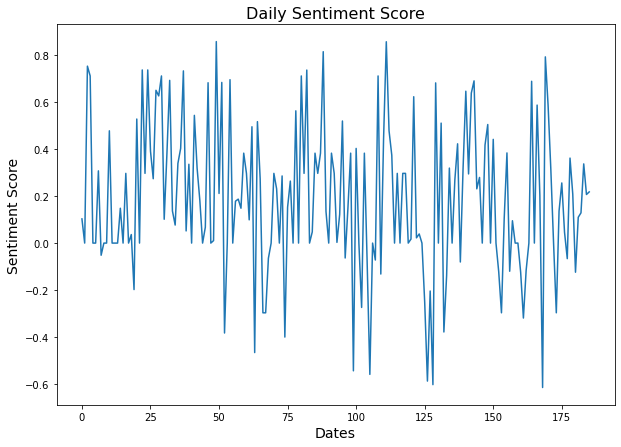

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(google_search_result_df["Sentiment Score"])
plt.title('Daily Sentiment Score', fontsize=16)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.show()

#### Read the daily 'NVDA' stock prices which were downloaded using R

In [155]:
stock_data = pd.read_excel(
    r"C:\Project\Stock Data.xlsx")


stock_data["Dates"] = pd.to_datetime(stock_data["Dates"]).dt.date

stock_data.rename(columns = {'NVDA.Adjusted':'Close'}, inplace = True)
stock_data.head()


,Dates,Close
0,2013-02-13,2.856458
1,2013-02-14,2.939590
2,2013-02-15,2.939590
3,2013-02-19,2.900333
4,2013-02-20,2.858768


In [156]:
stock_data.head()

,Dates,Close
0,2013-02-13,2.856458
1,2013-02-14,2.939590
2,2013-02-15,2.939590
3,2013-02-19,2.900333
4,2013-02-20,2.858768


In [157]:
nvda_news_df = pd.read_excel(
    r"C:\Project\Nvidia.xlsx")

nvda_news_df["Dates"] = pd.to_datetime(nvda_news_df["Dates"]).dt.date

nvda_news_df.drop(nvda_news_df.columns[[0]], axis=1, inplace=True)
nvda_news_df.tail()

,Dates,Sentiment Score
181,2023-02-20,0.109600
182,2023-02-21,0.128380
183,2023-02-22,0.336183
184,2023-02-23,0.206352
185,2023-02-24,0.217300


## Plot the Aggregated Mean Sentiment Score

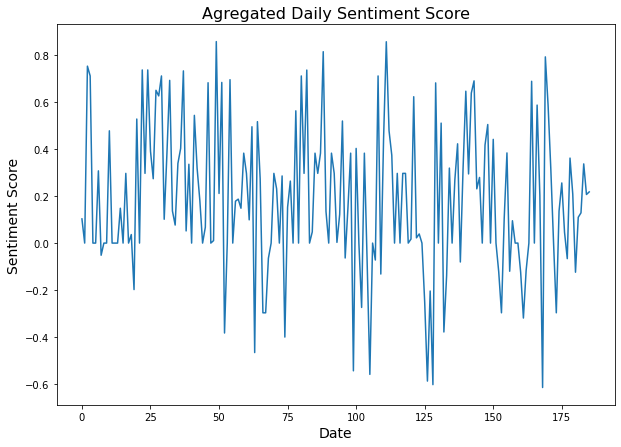

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(nvda_news_df["Sentiment Score"])
plt.title('Agregated Daily Sentiment Score', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.show()

## Merge Stock Data and Sentiment Scores


In [159]:
nvda_news_df = stock_data.merge(nvda_news_df,how='left', left_on='Dates', right_on='Dates')

# Replace blanks and nan with 0
nvda_news_df.fillna(0, inplace=True)
nvda_news_df

nvda_news_df.to_excel(r"C:\Project\Merged Data.xlsx")


In [160]:
# Create a signal column which would hold the buy/sell signals
nvda_news_df["Trade Signal"] = 0

# Generate a buy signal whenever the sentiment score is above a threshold
nvda_news_df.loc[nvda_news_df["Sentiment Score"] >= 0.65, "Trade Signal"] = 1

# Generate a sell signal whenever the sentiment score is below a threshold
nvda_news_df.loc[nvda_news_df["Sentiment Score"]  <= -0.65, "Trade Signal"] = -1

nvda_news_df.tail(5)

,Dates,Close,Sentiment Score,Trade Signal
2519,2023-02-15,227.639999,0.000000,0
2520,2023-02-16,220.020004,0.000000,0
2521,2023-02-17,213.880005,0.208183,0
2522,2023-02-21,206.550003,0.128380,0
2523,2023-02-22,207.539993,0.336183,0


### Calculate the daily returns based on sentiment score thresholds

In [161]:
# Calculate the returns
nvda_news_df["Returns"] = nvda_news_df['Close'].pct_change()

# Calculate returns from buying and selling sentiment scores
nvda_news_df["Strategy Returns"] = nvda_news_df["Trade Signal"].shift(1) * nvda_news_df["Returns"]
nvda_news_df = nvda_news_df.dropna()
nvda_news_df.head(5)

,Dates,Close,Sentiment Score,Trade Signal,Returns,Strategy Returns
1,2013-02-14,2.939590,0.0,0,0.029103,0.0
2,2013-02-15,2.939590,0.0,0,0.000000,0.0
3,2013-02-19,2.900333,0.0,0,-0.013355,-0.0
4,2013-02-20,2.858768,0.0,0,-0.014331,-0.0
5,2013-02-21,2.837986,0.0,0,-0.007270,-0.0


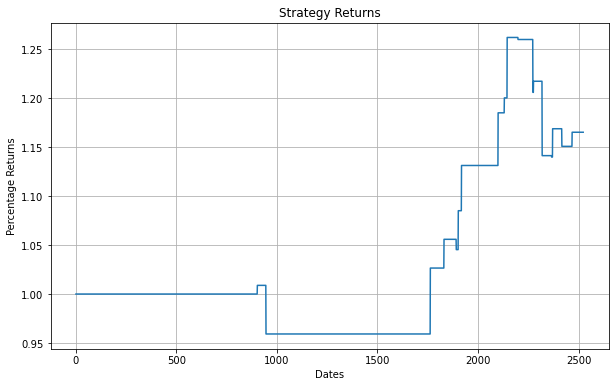

In [162]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the strategy returns
(nvda_news_df["Strategy Returns"]+1).cumprod().plot(figsize=(10, 6))

# Label the graph
plt.title("Strategy Returns")
plt.grid()
plt.xlabel("Dates")
plt.ylabel("Percentage Returns")
plt.show()